In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

%matplotlib inline

In [11]:
def batch_gradient_descent(theta, x, y, alpha=0.01, epsilon=200, print_cost=1000, plot=False):
    """
    Implements batch gradient descent using vectors and numpy.
    
    Arguments:
        theta     : (n + 1)-dimensional vector
        x         : (m, n + 1)-dimension matrix
        y         : (m, 1)-dimension vector
        epsilon   : cost function threshold
        alpha     : learning rate
        print_cost: # iterations to print cost
        
    Returns:
        theta, n_iter iterations
    """
    m = y.shape[0]
    n = theta.shape[0] - 1
    
    plot_data = []
    
    # Feature scaling
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    assert(x.shape == (m, n + 1)), 'invalid shape for x' + str(x.shape)
    assert(y.shape == (m , 1)), 'invalid shape for y' + str(y.shape)
    
    cost = epsilon + 1  # Acts as infinity
    iterations = 0
    
    while cost >= epsilon:  
        h = np.dot(x, theta)
        theta = theta - alpha / m * np.sum((h - y) * x, axis=0, keepdims=True).T
        iterations += 1
        cost = 1 / (2 * m) * np.sum((h - y) ** 2)
        
        if (iterations % print_cost == 0):
            plot_data.append([iterations, cost])
            print(cost)
    
    if plot:
        # Plot the cost function
        plot_x = [item[0] for item in plot_data]
        plot_y = [item[1] for item in plot_data]
        plt.plot(plot_x, plot_y, 'ro--')
            
    return theta, iterations

In [60]:
y = np.array([[400], [330], [369], [232], [540]], dtype=np.float64)
x = np.array([[2104,3], [1600,3], [2400,3], [1416,2], [3000,4]], dtype=np.float64)
x = np.concatenate((np.ones((5,1), dtype=np.float64), x), axis=1)
theta = np.array([[40], [30], [50]], dtype=np.float64)

In [61]:
t0, it = batch_gradient_descent(theta, x, y, alpha=0.1, print_cost=10000)

241.55022046783412
183.71510403322327
167.20977607428108
158.14127196898238
152.7062265596757


In [62]:
print(it, 'iterations taken.')

57842 iterations taken.


In [63]:
K = np.linalg.norm(t0)

In [58]:
data = load_boston()
x = data.data
y = data.target

In [59]:
y = y.reshape((506, 1))

In [60]:
x.shape

(506, 13)

In [61]:
x = np.concatenate((np.ones((506,1), dtype=np.float64), x), axis=1)

In [32]:
theta0 = np.random.randn(14, 1)

In [34]:
batch_gradient_descent(theta0, x, y, alpha=0.1, print_cost=10000)

270.38275098581613
247.7168124535086
227.6392698439217
209.834964064373
194.02823564687048
179.97790224936696
167.47287976809517
156.32836421474124
146.382502205229


(array([[318.3491618 ],
        [149.04036362],
        [422.44383821],
        [268.31780844],
        [337.23128679],
        [305.33317196],
        [332.46264176],
        [295.06371824],
        [342.83802631],
        [256.13802145],
        [285.76165778],
        [309.88177345],
        [334.83212306],
        [249.83892528]]), 90000)

In [3]:
def run_experiment(x, y, alpha=0.1, K='auto', epsilon=100, print_cost=1000000):
    """
    Runs one experiment (trial), comparing the number of iterations required to converge
    using 1/LC vs. custom alpha value.
    
    Args:
    -----
    x: (m, n + 1)-dimension matrix
    y: (m, 1)-dimension vector
    """
    m = x.shape[0]
    n = x.shape[1] - 1
    theta = np.random.randn(n + 1, 1)
    
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    theta_final, it = batch_gradient_descent(theta, x, y, alpha=alpha, epsilon=epsilon, print_cost=print_cost)
    print('Traditional:', it, 'iterations')
    
    if (K == 'auto'):
        K = np.linalg.norm(theta_final)
    print(K)
    L = K / m * np.linalg.norm(np.dot(x.T, x)) - 1 / m * np.linalg.norm(np.dot(y.T, x))
    a = np.abs(1 / L)
    print('Custom learning rate:', a)
    _, it = batch_gradient_descent(theta, x, y, alpha=a, epsilon=epsilon, print_cost=print_cost)
    print('Custom:', it, 'iterations')

In [62]:
run_experiment(x, y, K=514.5, epsilon=200)

Traditional: 46041 iterations
514.5
Custom learning rate: 8.314056750609444
Custom: 555 iterations


In [48]:
df = pd.DataFrame(x)

In [35]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
df.mean().sum()

910.961571581027

In [49]:
df.max().mean()

117.7972076923077

In [53]:
(911 + 118) / 2

514.5

## Cali housing dataset

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()

In [6]:
x, y = data.data, data.target

In [8]:
y = y.reshape(y.shape[0], 1)

In [9]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [40]:
df = pd.DataFrame(x)

In [41]:
df.describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [43]:
df.mean().sum() + 239  # because of the -119.5

1622.6453886510424

In [45]:
df.max().mean()

4636.993648863637

In [52]:
(1622.6 + 4637) / 2

3129.8

In [10]:
run_experiment(x, y, K=3129.8, epsilon=2.8051, print_cost=10000)

2.8052376997534756
2.8051432666430762
Traditional: 24582 iterations
3129.8
Custom learning rate: 5163.501867504555
Custom: 2 iterations


2.805322132874995
2.804834466519312
2.804346921815469
2.8038594987293153
2.8033721972267105
2.802885017273526
2.802397958835643
2.8019110218789516
2.8014242063693553
2.800937512272764
2.8004509395551023
2.7999644881823014
2.7994781581203054
2.7989919493350675
2.7985058617925525
2.798019895458733
2.797534050299595
2.7970483262811334
2.7965627233693535
2.7960772415302713
2.7955918807299125
2.7951066409343137
2.794621522109522
2.7941365242215936
2.7936516472365973
2.793166891120609
2.7926822558397184
2.7921977413600234
2.791713347647633
2.7912290746686663
2.7907449223892518
2.7902608907755306
2.789776979793652
2.789293189409775
2.788809519590073
2.788325970300725
2.7878425415079224
2.787359233177867
2.7868760452767707
2.7863929777708556
2.7859100306263533
2.7854272038095074
2.78494449728657
2.7844619110238047
2.783979444987485
2.7834970991438945
2.783014873459327
2.7825327679000873
2.782050782432489
2.7815689170228572
2.7810871716375276
2.7806055462428447
2.7801240408051635
2.779642655290

2.5928714495940914
2.5924364065091443
2.5920014703835355
2.591566641187573
2.591131918891575
2.590697303465869
2.5902627948807884
2.58982839310668
2.5893940981138956
2.5889599098727993
2.588525828353762
2.5880918535271644
2.587657985363395
2.5872242238328536
2.5867905689059465
2.58635702055309
2.5859235787447092
2.585490243451239
2.5850570146431218
2.58462389229081
2.5841908763647643
2.5837579668354547
2.58332516367336
2.5828924668489677
2.5824598763327753
2.582027392095287
2.5815950141070183
2.5811627423384924
2.5807305767602418
2.580298517342807
2.5798665640567386
2.5794347168725955
2.5790029757609454
2.5785713406923656
2.5781398116374414
2.577708388566768
2.577277071450948
2.576845860260594
2.5764147549663274
2.575983755538778
2.5755528619485855
2.5751220741663974
2.57469139216287
2.5742608159086693
2.57383034537447
2.573399980530955
2.572969721348816
2.572539567798755
2.5721095198514816
2.5716795774777137
2.5712497406481805
2.5708200093336173
2.5703903835047694
2.569960863132391
2.

2.405137144194655
2.4047479303934343
2.4043588109003466
2.4039697856895135
2.403580854735062
2.4031920180111275
2.4028032754918534
2.4024146271513898
2.402026072963896
2.401637612903538
2.401249246944491
2.4008609750609367
2.400472797227063
2.40008471341707
2.39969672360516
2.399308827765548
2.398921025872453
2.398533317900106
2.398145703822739
2.3977581836146
2.397370757249938
2.3969834247030124
2.396596185948091
2.396209040959448
2.3958219897113664
2.395435032178136
2.3950481683340548
2.3946613981534273
2.394274721610568
2.3938881386797974
2.393501649335444
2.3931152535518447
2.3927289513033436
2.392342742564291
2.3919566273090482
2.391570605511981
2.3911846771474656
2.3907988421898834
2.390413100613625
2.390027452393088
2.3896418975026776
2.3892564359168085
2.3888710676099
2.388485792556381
2.3881006107306892
2.3877155221072663
2.3873305266605653
2.3869456243650453
2.386560815195173
2.3861760991254224
2.385791476130276
2.3854069461842244
2.385022509261764
2.3846381653374005
2.384253

2.224196854918669
2.2238511446769977
2.223505516879376
2.2231599715034682
2.2228145085269464
2.222469127927489
2.2221238296827805
2.221778613770513
2.2214334801683853
2.221088428854101
2.2207434598053717
2.2203985729999163
2.2200537684154598
2.219709046029733
2.2193644058204733
2.219019847765427
2.2186753718423438
2.218330978028982
2.2179866663031063
2.2176424366424876
2.2172982890249044
2.21695422342814
2.2166102398299863
2.2162663382082393
2.215922518540704
2.2155787808051923
2.2152351249795195
2.2148915510415113
2.214548058968997
2.2142046487398135
2.213861320331806
2.2135180737228235
2.213174908890723
2.2128318258133683
2.21248882446863
2.212145904834383
2.2118030668885127
2.2114603106089077
2.2111176359734643
2.210775042960085
2.21043253154668
2.210090101711166
2.209747753431464
2.2094054866855037
2.209063301451222
2.20872119770656
2.2083791754294673
2.208037234597898
2.207695375189816
2.207353597183188
2.2070119005559903
2.206670285286204
2.2063287513518173
2.205987298730825
2.20

2.0636404140978346
2.063332694757472
2.063025047635118
2.062717472711468
2.0624099699672205
2.0621025393830803
2.0617951809397588
2.061487894617972
2.0611806803984427
2.0608735382618977
2.0605664681890707
2.0602594701607018
2.059952544157535
2.059645690160321
2.059338908149816
2.059032198106783
2.0587255600119874
2.058418993846204
2.058112499590211
2.0578060772247935
2.057499726730741
2.05719344808885
2.056887241279921
2.0565811062847628
2.0562750430841867
2.0559690516590123
2.0556631319900633
2.0553572840581693
2.055051507844166
2.054745803328894
2.0544401704932014
2.0541346093179387
2.0538291197839653
2.053523701872144
2.053218355563345
2.0529130808384424
2.052607877678317
2.052302746063855
2.0519976859759486
2.0516926973954948
2.0513877803033966
2.0510829346805637
2.0507781605079085
2.050473457766353
2.050168826436822
2.0498642665002462
2.0495597779375627
2.0492553607297137
2.048951014857648
2.0486467403023183
2.048342537044685
2.048038405065712
2.0477343443463702
2.047430354867635


1.9307958019350249
1.9305190334364513
1.930242328932449
1.9299656884061238
1.9296891118405894
1.9294125992189624
1.9291361505243645
1.9288597657399233
1.9285834448487704
1.9283071878340434
1.9280309946788836
1.9277548653664378
1.9274787998798584
1.927202798202301
1.9269268603169276
1.9266509862069048
1.9263751758554035
1.9260994292456008
1.9258237463606769
1.9255481271838188
1.925272571698217
1.9249970798870673
1.9247216517335712
1.9244462872209338
1.9241709863323664
1.9238957490510835
1.9236205753603064
1.9233454652432604
1.923070418683176
1.9227954356632877
1.922520516166836
1.9222456601770657
1.9219708676772265
1.921696138650573
1.921421473080365
1.9211468709498678
1.9208723322423493
1.9205978569410846
1.9203234450293534
1.9200490964904386
1.9197748113076296
1.9195005894642203
1.9192264309435094
1.9189523357288008
1.9186783038034017
1.9184043351506268
1.9181304297537929
1.9178565875962246
1.917582808661249
1.9173090929321983
1.9170354403924108
1.916761851025229
1.9164883248140006
1.

1.811220814432937
1.8109714930390721
1.8107222284401885
1.810473020621487
1.8102238695681736
1.8099747752654578
1.809725737698554
1.8094767568526804
1.8092278327130598
1.8089789652649193
1.8087301544934897
1.808481400384007
1.808232702921711
1.8079840620918455
1.807735477879659
1.8074869502704036
1.807238479249337
1.8069900648017203
1.806741706912818
1.8064934055679005
1.8062451607522418
1.80599697245112
1.8057488406498172
1.80550076533362
1.80525274648782
1.8050047840977126
1.8047568781485956
1.8045090286257746
1.804261235514557
1.804013498800255
1.803765818468185
1.8035181945036676
1.8032706268920278
1.8030231156185952
1.8027756606687029
1.802528262027689
1.8022809196808944
1.8020336336136669
1.8017864038113558
1.801539230259316
1.8012921129429065
1.80104505184749
1.8007980469584348
1.8005510982611117
1.8003042057408964
1.8000573693831698
1.7998105891733154
1.7995638650967225
1.799317197138783
1.7990705852848938
1.7988240295204574
1.7985775298308775
1.7983310862015651
1.7980846986179

1.7054489578847432
1.7052235593101135
1.7049982113364583
1.7047729139507635
1.7045476671400188
1.7043224708912177
1.7040973251913565
1.7038722300274365
1.7036471853864623
1.703422191255442
1.703197247621387
1.7029723544713136
1.7027475117922408
1.702522719571192
1.7022979777951939
1.7020732864512766
1.7018486455264756
1.7016240550078277
1.7013995148823748
1.7011750251371625
1.7009505857592395
1.700726196735659
1.700501858053478
1.7002775696997559
1.7000533316615574
1.6998291439259492
1.6996050064800032
1.699380919310795
1.6991568824054026
1.6989328957509082
1.6987089593343991
1.6984850731429642
1.6982612371636978
1.6980374513836967
1.6978137157900621
1.6975900303698983
1.697366395110314
1.6971428099984212
1.6969192750213353
1.6966957901661766
1.6964723554200674
1.6962489707701343
1.6960256362035087
1.695802351707324
1.6955791172687191
1.6953559328748347
1.6951327985128157
1.6949097141698122
1.694686679832976
1.6944636954894632
1.694240761126434
1.6940178767310528
1.693795042290486
1.69

1.6083298168349087
1.6081260636244163
1.6079223554843616
1.6077186924033091
1.607515074369825
1.60731150137248
1.6071079733998472
1.6069044904405032
1.6067010524830279
1.6064976595160039
1.6062943115280177
1.6060910085076596
1.6058877504435216
1.6056845373242004
1.6054813691382948
1.6052782458744068
1.605075167521143
1.6048721340671124
1.6046691455009268
1.6044662018112013
1.6042633029865552
1.6040604490156103
1.6038576398869915
1.6036548755893276
1.603452156111249
1.6032494814413918
1.6030468515683938
1.6028442664808953
1.6026417261675419
1.6024392306169808
1.6022367798178627
1.602034373758842
1.601832012428576
1.6016296958157252
1.6014274239089537
1.6012251966969278
1.6010230141683182
1.6008208763117986
1.6006187831160446
1.600416734569737
1.6002147306615586
1.6000127713801953
1.5998108567143372
1.5996089866526766
1.5994071611839096
1.5992053802967348
1.5990036439798547
1.598801952221975
1.598600305011804
1.5983987023380541
1.5981971441894403
1.5979956305546805
1.5977941614224969
1.5

1.5232450016329988
1.5230599384568928
1.522874915639332
1.5226899331702115
1.5225049910394275
1.5223200892368807
1.5221352277524731
1.5219504065761114
1.5217656256977026
1.5215808851071588
1.5213961847943942
1.5212115247493256
1.521026904961872
1.520842325421957
1.5206577861195059
1.5204732870444464
1.5202888281867102
1.5201044095362302
1.5199200310829442
1.5197356928167913
1.519551394727714
1.5193671368056574
1.5191829190405695
1.518998741422401
1.5188146039411063
1.5186305065866408
1.5184464493489649
1.51826243221804
1.5180784551838309
1.5178945182363062
1.5177106213654359
1.5175267645611936
1.5173429478135554
1.5171591711125003
1.5169754344480098
1.5167917378100695
1.5166080811886662
1.51642446457379
1.5162408879554343
1.5160573513235953
1.515873854668271
1.5156903979794636
1.5155069812471766
1.5153236044614182
1.5151402676121974
1.5149569706895274
1.5147737136834234
1.5145904965839039
1.51440731938099
1.5142241820647058
1.5140410846250782
1.5138580270521358
1.513675009335912
1.5134

1.4382082183488538
1.4380415589045275
1.4378749352437419
1.4377083473576697
1.4375417952374847
1.4373752788743641
1.437208798259488
1.4370423533840377
1.4368759442391974
1.436709570816155
1.4365432331060988
1.4363769311002206
1.436210664789715
1.4360444341657785
1.4358782392196099
1.435712079942411
1.4355459563253856
1.4353798683597403
1.4352138160366834
1.4350477993474267
1.434881818283184
1.4347158728351708
1.4345499629946061
1.4343840887527106
1.4342182501007086
1.4340524470298248
1.4338866795312888
1.4337209475963302
1.4335552512161827
1.4333895903820821
1.4332239650852663
1.4330583753169759
1.4328928210684528
1.432727302330944
1.4325618190956964
1.43239637135396
1.4322309590969882
1.4320655823160355
1.4319002410023591
1.4317349351472197
1.431569664741879
1.431404429777602
1.4312392302456558
1.4310740661373103
1.430908937443837
1.4307438441565108
1.4305787862666082
1.430413763765409
1.4302487766441943
1.4300838248942487
1.4299189085068582
1.4297540274733125
1.4295891817849022
1.429

1.3674548887859603
1.3673033155054675
1.3671517743118051
1.3670002651971656
1.3668487881537443
1.366697343173739
1.366545930249348
1.3663945493727736
1.366243200536219
1.36609188373189
1.3659405989519948
1.365789346188743
1.3656381254343473
1.3654869366810214
1.3653357799209822
1.3651846551464484
1.3650335623496406
1.3648825015227817
1.3647314726580964
1.3645804757478122
1.3644295107841578
1.3642785777593656
1.3641276766656683
1.3639768074953018
1.363825970240504
1.3636751648935148
1.363524391446576
1.363373649891932
1.3632229402218292
1.3630722624285159
1.3629216165042426
1.3627710024412623
1.3626204202318293
1.3624698698682012
1.3623193513426362
1.3621688646473964
1.3620184097747448
1.3618679867169463
1.3617175954662695
1.3615672360149829
1.361416908355359
1.3612666124796715
1.3611163483801967
1.3609661160492128
1.3608159154789994
1.3606657466618397
1.3605156095900175
1.36036550425582
1.3602154306515355
1.3600653887694554
1.3599153786018718
1.3597654001410808
1.359615453379379
1.3594

1.3007214212609017
1.3005838745394587
1.300446356516093
1.300308867183922
1.300171406536066
1.300033974565646
1.2998965712657857
1.2997591966296107
1.299621850650248
1.2994845333208263
1.2993472446344774
1.299209984584333
1.2990727531635289
1.2989355503652007
1.298798376182487
1.2986612306085283
1.2985241136364667
1.2983870252594456
1.2982499654706114
1.2981129342631117
1.2979759316300958
1.2978389575647151
1.297702012060123
1.2975650951094744
1.2974282067059264
1.2972913468426381
1.2971545155127693
1.2970177127094835
1.2968809384259445
1.2967441926553192
1.2966074753907744
1.2964707866254812
1.2963341263526107
1.296197494565337
1.2960608912568354
1.295924316420283
1.2957877700488594
1.2956512521357455
1.2955147626741237
1.2953783016571798
1.2952418690780994
1.295105464930071
1.2949690892062853
1.294832741899934
1.2946964230042117
1.2945601325123135
1.2944238704174373
1.2942876367127827
1.2941514313915508
1.2940152544469448
1.29387910587217
1.2937429856604328
1.2936068938049425
1.29347

1.2401219519762283
1.2399969603525591
1.2398719944374699
1.2397470542248847
1.2396221397087288
1.2394972508829296
1.2393723877414158
1.2392475502781177
1.2391227384869679
1.2389979523618997
1.238873191896848
1.2387484570857508
1.2386237479225455
1.238499064401173
1.2383744065155753
1.238249774259695
1.238125167627478
1.2380005866128705
1.237876031209821
1.2377515014122793
1.2376269972141969
1.237502518609527
1.2373780655922249
1.237253638156246
1.2371292362955493
1.2370048600040935
1.2368805092758404
1.2367561841047532
1.2366318844847954
1.2365076104099342
1.2363833618741367
1.2362591388713722
1.2361349413956118
1.236010769440828
1.2358866230009948
1.2357625020700884
1.2356384066420862
1.2355143367109669
1.2353902922707112
1.2352662733153013
1.235142279838721
1.2350183118349558
1.2348943692979932
1.2347704522218215
1.2346465606004307
1.2345226944278131
1.234398853697962
1.2342750384048726
1.2341512485425414
1.2340274841049672
1.2339037450861494
1.2337800314800897
1.2336563432807914
1.2

1.1835405449304903
1.183427108785099
1.1833136956371901
1.1832003054814095
1.183086938312404
1.1829735941248223
1.1828602729133142
1.182746974672531
1.182633699397126
1.1825204470817523
1.1824072177210658
1.1822940113097238
1.1821808278423844
1.1820676673137078
1.1819545297183545
1.181841415050988
1.1817283233062714
1.181615254478871
1.1815022085634526
1.1813891855546856
1.1812761854472391
1.181163208235784
1.181050253914993
1.18093732247954
1.1808244139241006
1.180711528243351
1.1805986654319691
1.1804858254846355
1.1803730083960302
1.1802602141608356
1.1801474427737357
1.180034694229416
1.179921968522562
1.1798092656478623
1.1796965856000063
1.1795839283736846
1.1794712939635894
1.1793586823644144
1.1792460935708544
1.1791335275776058
1.1790209843793664
1.178908463970835
1.1787959663467125
1.1786834915017008
1.1785710394305036
1.1784586101278252
1.1783462035883716
1.1782338198068512
1.178121458777972
1.178009120496445
1.1778968049569816
1.1777845121542951
1.1776722420831
1.1775599947

1.1325677363439244
1.1324645630506214
1.1323614103826978
1.1322582783354211
1.1321551669040626
1.132052076083893
1.1319490058701849
1.131845956258212
1.131742927243249
1.1316399188205726
1.13153693098546
1.1314339637331898
1.1313310170590423
1.131228090958298
1.1311251854262396
1.1310223004581508
1.1309194360493162
1.130816592195022
1.1307137688905553
1.130610966131205
1.1305081839122604
1.1304054222290125
1.1303026810767538
1.1301999604507778
1.1300972603463788
1.1299945807588527
1.1298919216834968
1.1297892831156093
1.1296866650504898
1.129584067483439
1.129481490409759
1.129378933824753
1.1292763977237257
1.1291738821019823
1.1290713869548301
1.1289689122775772
1.1288664580655328
1.1287640243140074
1.1286616110183127
1.1285592181737625
1.1284568457756698
1.1283544938193513
1.128252162300123
1.1281498512133026
1.12804756055421
1.1279452903181644
1.1278430405004884
1.1277408110965046
1.1276386021015365
1.1275364135109098
1.1274342453199506
1.1273320975239867
1.127229970118347
1.127127

1.0890040896680588
1.0889095701296325
1.0888150692449765
1.0887205870098713
1.0886261234200976
1.0885316784714376
1.0884372521596744
1.0883428444805932
1.0882484554299783
1.0881540850036167
1.0880597331972963
1.087965400006805
1.0878710854279334
1.0877767894564716
1.087682512088212
1.0875882533189478
1.0874940131444724
1.0873997915605815
1.0873055885630711
1.0872114041477388
1.0871172383103826
1.0870230910468026
1.086928962352799
1.0868348522241735
1.086740760656729
1.086646687646269
1.0865526331885988
1.086458597279524
1.0863645799148522
1.0862705810903912
1.08617660080195
1.0860826390453393
1.0859886958163705
1.0858947711108555
1.0858008649246085
1.0857069772534438
1.0856131080931772
1.0855192574396257
1.0854254252886064
1.085331611635939
1.0852378164774432
1.0851440398089398
1.0850502816262513
1.084956541925201
1.0848628207016127
1.0847691179513124
1.0846754336701263
1.0845817678538818
1.0844881204984074
1.0843944915995332
1.0843008811530894
1.0842072891549082
1.0841137156008223
1.0

1.0485526249421535
1.0484660385575715
1.048379469044305
1.0482929163985897
1.048206380616663
1.0481198616947631
1.0480333596291285
1.0479468744159997
1.0478604060516172
1.047773954532223
1.04768751985406
1.0476011020133724
1.0475147010064039
1.0474283168294012
1.0473419494786105
1.047255598950279
1.0471692652406561
1.047082948345991
1.0469966482625337
1.0469103649865363
1.0468240985142505
1.04673784884193
1.0466516159658292
1.046565399882203
1.046479200587308
1.0463930180774008
1.04630685234874
1.0462207033975839
1.0461345712201933
1.0460484558128285
1.0459623571717516
1.0458762752932256
1.045790210173514
1.0457041618088811
1.045618130195594
1.0455321153299177
1.045446117208121
1.0453601358264717
1.0452741711812394
1.0451882232686944
1.0451022920851085
1.0450163776267536
1.0449304798899033
1.0448445988708313
1.044758734565813
1.0446728869711246
1.0445870560830428
1.044501241897846
1.0444154444118128
1.0443296636212231
1.044243899522358
1.0441581521114989
1.0440724213849288
1.0439867073

1.010128306973244
1.010049159901604
1.0099700280532684
1.0098909114248897
1.0098118100131213
1.0097327238146165
1.0096536528260305
1.0095745970440182
1.0094955564652368
1.0094165310863428
1.0093375209039945
1.0092585259148508
1.0091795461155713
1.0091005815028165
1.0090216320732481
1.0089426978235283
1.00886377875032
1.0087848748502868
1.0087059861200942
1.0086271125564068
1.0085482541558919
1.0084694109152161
1.008390582831048
1.008311769900056
1.0082329721189105
1.0081541894842814
1.0080754219928403
1.0079966696412597
1.0079179324262126
1.0078392103443725
1.0077605033924146
1.0076818115670148
1.0076031348648486
1.0075244732825939
1.0074458268169286
1.0073671954645316
1.0072885792220823
1.0072099780862618
1.0071313920537515
1.0070528211212328
1.0069742652853904
1.0068957245429067
1.0068171988904668
1.0067386883247567
1.0066601928424619
1.0065817124402707
1.0065032471148705
1.0064247968629503
1.0063463616811996
1.0062679415663094
1.0061895365149705
1.0061111465238757
1.0060327715897173

(array([[2870.75377638],
        [3633.95453982],
        [2977.73996734],
        [2972.17581827],
        [2771.67523441],
        [2728.19553926],
        [1413.29583906],
        [2847.29084251],
        [2872.69837235]]), 8431)

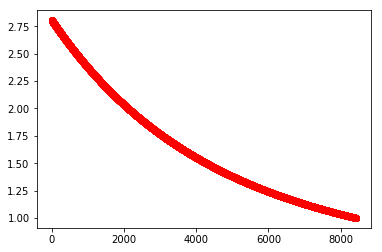

In [15]:
theta = np.random.randn(x.shape[1], 1)
batch_gradient_descent(theta, x, y, alpha=5163.5, epsilon=1, print_cost=1, plot=True)

## Energy efficiency dataset

In [71]:
df = pd.read_excel('energy_efficiency.xlsx')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [73]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [75]:
x_cols = ['X' + str(c) for c in range(1, 9)]
print(x_cols)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


In [79]:
x = np.array(df[x_cols])
y = np.array(df['Y1'])

In [80]:
y.shape

(768,)

In [81]:
y = y.reshape(y.shape[0], 1)

In [82]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [84]:
x_df = df[x_cols]

In [85]:
K = (x_df.mean().sum() + x_df.max().mean()) / 2
print(K)

681.1792708333335


In [88]:
run_experiment(x, y, K=K, print_cost=100000)

231.73779748684348
181.84652494431285
145.1382068848754
118.1125042478078
Traditional: 489592 iterations
681.1792708333335
Custom learning rate: 12.777895560537498
Custom: 3833 iterations


## Online news popularity

In [89]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [139]:
x_df = df[df.columns[1:-1]]
y_df = df[df.columns[-1]]

In [140]:
x = np.array(x_df)
y = np.array(y_df)

y = y.reshape(y.shape[0], 1)
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [141]:
x.shape

(39644, 60)

In [142]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [143]:
x_df = pd.DataFrame(x)
K = (x_df.mean().sum() + x_df.max().mean()) / 2
print(K)

576359.2450739361


In [145]:
run_experiment(x, y, K=K, epsilon=73355000, print_cost=1000)

73355536.3892745
73355482.662419
73355428.93606222
73355375.2102041
73355321.48484468
73355267.75998393
73355214.03562185
73355160.31175841
73355106.58839366
73355052.86552754
Traditional: 10985 iterations
576359.2450739361
Custom learning rate: 1.462188436455874
Custom: 753 iterations
